In [111]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy
import random
import scipy
import glob
import os
from sklearn.metrics import root_mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns

In [145]:
CIs = []
def convert_ci(ci):
    if type(ci) == str:
        ci_list = [float(i) for i in ci.split('_')]
        return ci_list
    else:
        ci_str = str(ci[0]) + '_' + str(ci[1]) + '_' + str(ci[2]) + '_' + str(ci[3])
        return ci_str
def import_dfs():
    # Path to the folder containing CSV files
    folder_path = '../data/'

    # Get a list of all CSV files in the folder
    csv_files = glob.glob(os.path.join(folder_path, '*.csv'))
    # Initialize an empty list to hold dataframes
    data_frames = {}

    # Read the first CSV file to establish the schema
    schema = ['ester_mm', 'amox_mm', 'apa_mm', 'aoh_mm','apa_t']

    # Load each remaining CSV file, reorder columns, and append to the list
    for file in csv_files:
        df = pd.read_csv(file)  
        df = df[schema]  # Reorder columns to match the schema
        ci = df.iloc[0,:4].to_numpy()
        data_frames[convert_ci(ci)] = df
        CIs.append(convert_ci(ci))
    
    csv_files = [name.split('\\')[-1].rstrip('.csv') for name in csv_files]

    return data_frames,csv_files 
data_frames,file_list = import_dfs()

non_ci = ['20.0_0.0_60.0_0.0', '30.0_0.0_30.0_0.0', '80.0_0.0_5.0_0.0']
train_ci = ['80.0_0.0_40.0_0.0', '40.5_0.0_21.75_3.372620126926563', '30.4_0.0_43.0_2.55', '38.75_0.0_12.0_1.4', '80.0_0.0_60.0_0.0', '30.0_0.0_5.0_0.0']
test_ci = ['40.038986354775815_0.0640149834167829_100.04518072289156_1.4210854715202004', '32.5_0.0_78.0_2.5', '80.0_0.0_20.0_0.0', '55.0_0.0_10.0_0.0','55.0_0.0_55.0_0.623377','55.0_0.0_5.0_0.0']

train_size = len(train_ci)
test_size = len(CIs) - train_size - len(non_ci)

print("treino: ", train_ci)
print("teste: ",test_ci)
print("não incluido: ",non_ci)

treino:  ['80.0_0.0_40.0_0.0', '40.5_0.0_21.75_3.372620126926563', '30.4_0.0_43.0_2.55', '38.75_0.0_12.0_1.4', '80.0_0.0_60.0_0.0', '30.0_0.0_5.0_0.0']
teste:  ['40.038986354775815_0.0640149834167829_100.04518072289156_1.4210854715202004', '32.5_0.0_78.0_2.5', '80.0_0.0_20.0_0.0', '55.0_0.0_10.0_0.0', '55.0_0.0_55.0_0.623377', '55.0_0.0_5.0_0.0']
não incluido:  ['20.0_0.0_60.0_0.0', '30.0_0.0_30.0_0.0', '80.0_0.0_5.0_0.0']


['80.0_0.0_40.0_0.0', '40.5_0.0_21.75_3.372620126926563', '30.4_0.0_43.0_2.55', '38.75_0.0_12.0_1.4', '80.0_0.0_60.0_0.0', '30.0_0.0_5.0_0.0']
train:  [[80.   40.  ]
 [40.5  21.75]
 [30.4  43.  ]
 [38.75 12.  ]
 [80.   60.  ]
 [30.    5.  ]]
test:  [[ 40.03898635 100.04518072]
 [ 32.5         78.        ]
 [ 80.          20.        ]
 [ 55.          10.        ]
 [ 55.          55.        ]
 [ 55.           5.        ]]


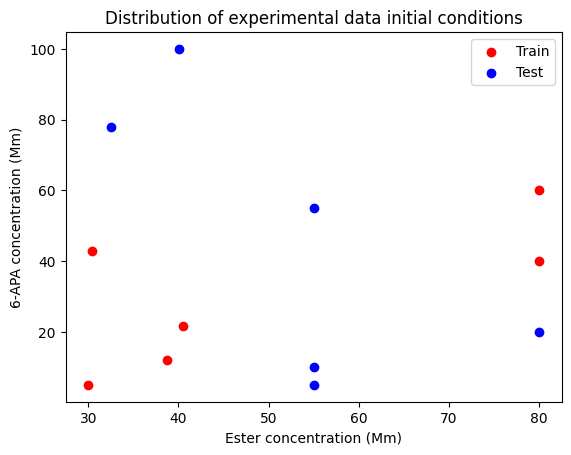

In [147]:
ic2trainplot = np.zeros((train_size,2))
ic2testplot = np.zeros((test_size,2))

print(train_ci)
#for i in range(len(CIs)):
#    ic2plot[i,:] = [convert_ci(CIs[i])[0],convert_ci(CIs[i])[2]]

for idx,i in enumerate(train_ci):
    ic2trainplot[idx,:] = [convert_ci(i)[0],convert_ci(i)[2]]
for idx,i in enumerate(test_ci):
    ic2testplot[idx,:] = [convert_ci(i)[0],convert_ci(i)[2]]
    
print("train: ",ic2trainplot)
print("test: ",ic2testplot)
plt.title("Distribution of experimental data initial conditions")
plt.xlabel("Ester concentration (Mm)")
plt.ylabel("6-APA concentration (Mm)")
plt.scatter(ic2trainplot[:,0],ic2trainplot[:,1],c='r');
plt.scatter(ic2testplot[:,0],ic2testplot[:,1],c='b');
plt.legend(['Train','Test']);


In [148]:
# luci parameters

kcat1        = 0.178 #Constante catal�tica do consumo do �ster (�mol/i.u. per min)
 
kcat2        = 0.327 #Constante catal�tica da hidr�lise da amoxicilina (�mol/i.u. per min)
 
Km1          = 7.905 #Constante de Michaelis-Menten ou constante de afinidade para consumo do �ster(mM) 
 
Km2          = 12.509 #Constante de Michaelis-Menten ou constante de afinidade para hidr�lise da amoxicilina(mM)
 
Tmax         = 0.606 #Taxa de convers�o m�xima do complexo acil-enzima-n�cleo em produto
 
Ken          = 14.350 #Constante de adsor��o do 6-APA
 
kAB          = 3.78 #Constante de inibi��o do �ster(POHPGME)(mM)
 
kAN          = 9.174 #Constante de inibi��o da amoxicilina (mM)
 
kAOH         = 10.907 #Constante de inibi��o do POHPG, produto da hidr�lise da amoxicilina (mM)
 
kNH          = 62.044 #Constante de inibi��o do 6-APA

luci_P = np.zeros(10)
luci_P[0]   = kcat1    
luci_P[1]   = kcat2    
luci_P[2]   = Km1      
luci_P[3]   = Km2      
luci_P[4]   = Tmax     
luci_P[5]   = Ken      
luci_P[6]   = kAB      
luci_P[7]   = kAN      
luci_P[8]   = kAOH     
luci_P[9]  = kNH 

labels = ['kcat1',
    'kcat2',
    'Km1',
    'Km2',  
    'Tmax', 
    'Ken',  
    'kAB',  
    'kAN',  
    'kAOH', 
    'kNH']

In [149]:
def enzymic_amox(t,y, 
kcat1,
kcat2,
Km1,
Km2,  
Tmax, 
Ken,  
kAB,  
kAN,  
kAOH, 
kNH):
    FAB = 0
    FNH = 0 
    
    CAB = y[0]
    CAN = y[1]
    CNH = y[2]
    CAOH = y[3]

    Cez = 1

    # Consumo de ester
    VAB = (kcat1*CAB*Cez)/((Km1*(1 + (CAN/kAN) + (CAOH/kAOH))) + CAB)
    
    # Hidrolise de amoxicilina
    VAN = (kcat2*CAN*Cez)/((Km2*(1 + (CAB/kAB) + (CNH/kNH) + (CAOH/kAOH))) + CAN)
    
    # Enzima saturada com 6-apa
    X   = CNH/(Ken + CNH)
    
    # Sintese enzimatica
    VS  = VAB*Tmax*X

    # Hidrolise de ester
    Vh1 = (VAB - VS) 

    dy = np.zeros(4)

    # C. ester
    dy[0] = -VAB
    
    # C. amox
    dy[1] = VS - VAN                     
    
    # C. 6-apa
    dy[2] = VAN - VS               
    
    # C. POHPG
    dy[3] =  Vh1 + VAN
    
    return np.array(dy)  

In [150]:
# ode15s from MATLAB

def ode15s_amox(P, CI, t):
    return scipy.integrate.solve_ivp(enzymic_amox,t_span=(t[0],t[-1]),t_eval=t,y0=CI,method='BDF',args=P).y.T

In [151]:
# RK45 solver

def ode15s_amox(P, CI, t):
    try:
        sol = scipy.integrate.solve_ivp(
            enzymic_amox, 
            t_span=(t[0], t[-1]), 
            t_eval=t, 
            y0=CI, 
            method='BDF', 
            args=P, 
            #atol=1e-8, 
            #tol=1e-6
        )
        if sol.status != 0:
            raise ValueError("ODE solver failed to converge")
        return sol.y.T
    except Exception as e:
        print(f"Solver failed with error: {e}")
        # Handle solver failure (e.g., return NaNs or retry with different parameters)
        return np.full((len(CI), len(t)), np.nan).T
    

In [159]:
random.seed(50)
def mcmc(P,N=5000,ode_solver=ode15s_amox,status=False,results_folder='temp',waux=6e-3):

    Np = len(P)
    
    # Extracting data

    exps = []
    all_times = []
    times = []
    
    for i in range(len(CIs)):
        all_times.append(data_frames[CIs[i]].loc[:,'apa_t'].dropna().to_numpy())

    size_train = len(train_ci)
    train_ci_list = [convert_ci(ci) for ci in train_ci]

    for i in range(size_train):
        t = data_frames[train_ci[i]].loc[:,'apa_t'].dropna().to_numpy()

        exp = np.zeros((len(t),4))
        
        exp[:,0]  = data_frames[train_ci[i]].loc[:,'ester_mm'].dropna().to_numpy()
        exp[:,1]  = data_frames[train_ci[i]].loc[:,'amox_mm'].dropna().to_numpy()
        exp[:,2] =  data_frames[train_ci[i]].loc[:,'apa_mm'].dropna().to_numpy()
        exp[:,3]  = data_frames[train_ci[i]].loc[:,'aoh_mm'].dropna().to_numpy()
        exps.append(exp)

        times.append(t)

    Cez = 1

    refs = []
    desvio = np.zeros((4,size_train))

    for i in range(size_train):
        t = times[i]
        ref = np.zeros((len(t),4))
        Y = ode_solver(P,convert_ci(CIs[i]),t)

        ref[:,0]   =  Y[:,0]      
        ref[:,1]   =  Y[:,1]    
        ref[:,2]   =  Y[:,2]      
        ref[:,3]  =   Y[:,3]

        refs.append(ref)

        desvio[0,i] =  0.1*max(ref[:,0]) 
        desvio[1,i] =  0.1*max(ref[:,1])
        desvio[2,i] =  0.1*max(ref[:,2])
        desvio[3,i] =  0.1*max(ref[:,3])
    
    waux      = waux 
    media_g   = 1       #Média gaussiana
    desviop_g = 0.6     #Desvio dos parâmetros ao utilizar priori gaussian

    estimate = [i for i in range(len(P))]
    Nfix = len(estimate)

    p_ref = P                   
    p_old = P                     

    media_MCMC = media_g*P
    desvio_P   = desviop_g*P

    w = np.ones((1,Np))   
    w = w*waux  

    parametro_exato = (p_ref*np.ones((N,1))).T
    
    aceitacao    = np.zeros((1,N))  
    cadeia       = np.zeros((Np,N)) 
    conv_likeli  = np.zeros((1,N))
    k=0
    lk_old = 0
        
    for i in range(size_train):
        Lk_1 = np.dot((exps[i][:,0] - refs[i][:,0]),(exps[i][:,0] - refs[i][:,0]).T) / (desvio[0,i]**2)     
        Lk_2 = np.dot((exps[i][:,1] - refs[i][:,1]),(exps[i][:,1] - refs[i][:,1]).T) / (desvio[1,i]**2)      
        Lk_3 = np.dot((exps[i][:,2] - refs[i][:,2]),(exps[i][:,2] - refs[i][:,2]).T) / (desvio[2,i]**2)       
        Lk_4 = np.dot((exps[i][:,3] - refs[i][:,3]),(exps[i][:,3] - refs[i][:,3]).T) / (desvio[3,i]**2)  
        lk_partial = Lk_1 + Lk_2 + Lk_3 + Lk_4
        lk_old += lk_partial
    

    prior_old = np.sum((((p_old - media_MCMC))/((desvio_P)**2)))
    cadeia[:,0] = p_old
    
    # Contador para verificar a aceitação
    for i in range(0, N):
        progress = (i / N) * 100
        if status and i % 100 == 0:  # Print progress every 100 iterations
            print(f'Progress: {(i / N) * 100:.2f}%', end='\r')
        # New parameter vector
        P_new = p_old + w * np.random.randn(Np) * p_old
        if (P_new[0,4] > 1) or (P_new[0,4] < 0):
            continue
        #print('p_new: ', P_new)
        # Simulate using ODE solver

        chain_ref = []
        for j in range(size_train):
            t = times[j]
            ref = np.zeros((len(t),4))

            Y = ode_solver(P_new[0],convert_ci(CIs[j]),t)
            ref[:,0]  =  Y[:,0]      
            ref[:,1]  =  Y[:,1]    
            ref[:,2]  =  Y[:,2]      
            ref[:,3] =   Y[:,3]
            chain_ref.append(ref)


        # Calculate new prior
        Prior_new = np.sum(((P_new[0] - media_MCMC) / desvio_P) ** 2)

        Lk_new = 0
        # Likelihood calculations
        for j in range(size_train):
            Lk_1 = np.dot((exps[j][:,0] - chain_ref[j][:,0]),(exps[j][:,0] - chain_ref[j][:,0]).T) / (desvio[0,j]**2)     
            Lk_2 = np.dot((exps[j][:,1] - chain_ref[j][:,1]),(exps[j][:,1] - chain_ref[j][:,1]).T) / (desvio[1,j]**2)      
            Lk_3 = np.dot((exps[j][:,2] - chain_ref[j][:,2]),(exps[j][:,2] - chain_ref[j][:,2]).T) / (desvio[2,j]**2)       
            Lk_4 = np.dot((exps[j][:,3] - chain_ref[j][:,3]),(exps[j][:,3] - chain_ref[j][:,3]).T) / (desvio[3,j]**2)  
            lk_partial = Lk_1 + Lk_2 + Lk_3 + Lk_4
            Lk_new += lk_partial 
    
        # MCMC acceptance check
        if np.log(random.random()) < (-0.5 * (Lk_new + Prior_new - lk_old - prior_old)):
            p_old = P_new
            lk_old = Lk_new
            prior_old = Prior_new
            k += 1
        
        # Store results
        aceitacao[0,i] = k
        cadeia[:, i] = p_old
        conv_likeli[0,i] = lk_old + prior_old
    print("aceitacao: ", k/N, 'k: ', k)
    fig,ax = plt.subplots(2,5,figsize=[20,8])
    ax = ax.flatten()

    labels = ['kcat1',
    'kcat2',
    'Km1',
    'Km2',  
    'Tmax', 
    'Ken',  
    'kAB',  
    'kAN',  
    'kAOH', 
    'kNH']
    
    for idx,g in enumerate(ax):
        g.plot(cadeia[idx,:])    
        g.set_title(labels[idx])
        g.set_ylabel("Value")
        g.set_xlabel("Iteration")
    
    fig.savefig(f"../results/{results_folder}/chains/multi_{N}.png",dpi=400)
    plt.close()    

    aq = int(0.9 * N)  # Starting index for the burn-in period
    IC = 0.99          # Confidence interval level

    # Confidence interval bounds
    xaux = (1 - IC) / 2
    IC_inf = xaux
    IC_sup = 1 - xaux
    estimate = [i for i in range(Np)]

    amostra = N - aq + 1
    amostras = [] # [CIs, Nics, t, subs]


    output_par = np.zeros((amostra,Np))
    for i in range(len(CIs)):
        t = all_times[i]
        inst_amostra = np.zeros((len(list(range(aq, N + 1))),len(t),4))

        for idx,j in enumerate(range(aq, N + 1)):
            ii = j - aq
            paux = cadeia[:, j - 1]
            output_par[ii,:] = paux
            
            Y = ode_solver(paux,convert_ci(CIs[i]),t)
            inst_amostra[idx,:,0]  = Y[:,0]
            inst_amostra[idx,:,1] = Y[:,1]
            inst_amostra[idx,:,2] = Y[:,2]
            inst_amostra[idx,:,3] = Y[:,3]
        
        amostras.append(inst_amostra)


    AB_media = []
    AN_media = []
    NH_media = []
    AOH_media =[]
    AB_sup = []
    AN_sup = []
    NH_sup = []
    AOH_sup =[]
    AB_inf = []
    AN_inf = []
    NH_inf = []
    AOH_inf =  []   

    for i in range(len(CIs)):
        t = all_times[i]
        amostra = amostras[i]
        
        AB_mean = np.zeros(len(t))
        AB_inferior = np.zeros(len(t))
        AB_superior = np.zeros(len(t))
        NH_mean = np.zeros(len(t))
        NH_inferior = np.zeros(len(t))
        NH_superior = np.zeros(len(t))

        for j in range(len(t)):    
            AB_mean[j] = np.mean(amostra[:,j,0])
            y = np.percentile(amostra[:, j,0], [IC_inf * 100, IC_sup * 100])
            AB_inferior[j] = y[0]
            AB_superior[j] = y[1]

            NH_mean[j] = np.mean(amostra[:, j,2])
            y = np.percentile(amostra[:, j,2], [IC_inf * 100, IC_sup * 100])
            NH_inferior[j] = y[0]
            NH_superior[j] = y[1]
        
        AN_mean = np.zeros(len(t))
        AN_inferior = np.zeros(len(t))
        AN_superior = np.zeros(len(t))
        AOH_mean = np.zeros(len(t))
        AOH_inferior = np.zeros(len(t))
        AOH_superior = np.zeros(len(t))
        
        for j in range(len(t)):
            AN_mean[j] = np.mean(amostra[:, j, 1])
            y = np.percentile(amostra[:, j,1], [IC_inf * 100, IC_sup * 100])
            AN_inferior[j] = y[0]
            AN_superior[j] = y[1]

            AOH_mean[j] = np.mean(amostra[:, j,3])
            y = np.percentile(amostra[:, j,3], [IC_inf * 100, IC_sup * 100])
            AOH_inferior[j] = y[0]
            AOH_superior[j] = y[1]

        AB_media.append(AB_mean)
        NH_media.append(NH_mean)
        AB_inf.append(AB_inferior)
        AB_sup.append(AB_superior)
        NH_inf.append(NH_inferior)
        NH_sup.append(NH_superior)
        AN_media.append(AN_mean)
        AOH_media.append(AOH_mean)
        AN_inf.append(AN_inferior)
        AN_sup.append(AN_superior)
        AOH_inf.append(AOH_inferior)
        AOH_sup.append(AOH_superior)

    # individual plot
    # Ensure 'results' directory exists
    results_dir = f'../results/{results_folder}'

    if not os.path.exists(results_dir):
        os.makedirs(results_dir)
    for i in range(len(CIs)):
        names = ['POH-PGME','Amoxicillin','6-APA','POHPG']
        t = all_times[i]
        style = ['or','og','ob','ok']
        mstyle = ['-r','-g','-b','-k']
        medidas = [
            [AB_media[i], AB_inf[i], AB_sup[i]],
            [AN_media[i], AN_inf[i], AN_sup[i]],
            [NH_media[i], NH_inf[i], NH_sup[i]],
            [AOH_media[i],AOH_inf[i],AOH_sup[i]]
        ]
        fig,ax = plt.subplots(2,2,figsize=(10,10))
        for idx,axis in enumerate(ax.flatten()):
            sname = names[idx]
            medida = medidas[idx]
            
            axis.plot(t, data_frames[CIs[i]].iloc[:,idx].to_numpy(), style[idx], label=sname)
            axis.plot(t, medida[0], mstyle[idx])
            axis.plot(t, medida[1], '--r',linewidth=0.5)
            axis.plot(t, medida[2], '--r',linewidth=0.5) 
            axis.set_xlabel('Tempo (min)')
            axis.set_ylabel(f'Concentração de {sname} (mm)')  # Use f-string for proper string formatting
            axis.legend()  # Adjust legend position

        fig.savefig(os.path.join(results_dir, f"{N}_{file_list[i]}_mcmc.png"), dpi=300)
        plt.close()  # Close the figure to release memory
    return output_par,k/N

In [160]:
output_par, aceitacao = mcmc(P=luci_P,N=50000,status=True,results_folder='model_luci_multi_sel')

aceitacao:  0.33486 k:  16743


C:\Users\artur\AppData\Local\Temp\ipykernel_15144\337683925.py:23: RuntimeWarning: invalid value encountered in scalar divide
  VAB = (kcat1*CAB*Cez)/((Km1*(1 + (CAN/kAN) + (CAOH/kAOH))) + CAB)
C:\Users\artur\AppData\Local\Temp\ipykernel_15144\337683925.py:26: RuntimeWarning: divide by zero encountered in scalar divide
  VAN = (kcat2*CAN*Cez)/((Km2*(1 + (CAB/kAB) + (CNH/kNH) + (CAOH/kAOH))) + CAN)
C:\Users\artur\AppData\Local\Temp\ipykernel_15144\337683925.py:26: RuntimeWarning: invalid value encountered in scalar divide
  VAN = (kcat2*CAN*Cez)/((Km2*(1 + (CAB/kAB) + (CNH/kNH) + (CAOH/kAOH))) + CAN)
C:\Users\artur\AppData\Local\Temp\ipykernel_15144\337683925.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  VAB = (kcat1*CAB*Cez)/((Km1*(1 + (CAN/kAN) + (CAOH/kAOH))) + CAB)
C:\Users\artur\AppData\Local\Temp\ipykernel_15144\337683925.py:26: RuntimeWarning: invalid value encountered in scalar add
  VAN = (kcat2*CAN*Cez)/((Km2*(1 + (CAB/kAB) + (CNH/kNH) + (CAOH/kAOH))) + 

Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver f

C:\Users\artur\AppData\Local\Temp\ipykernel_15144\337683925.py:26: RuntimeWarning: invalid value encountered in scalar multiply
  VAN = (kcat2*CAN*Cez)/((Km2*(1 + (CAB/kAB) + (CNH/kNH) + (CAOH/kAOH))) + CAN)
C:\Users\artur\AppData\Local\Temp\ipykernel_15144\337683925.py:23: RuntimeWarning: invalid value encountered in scalar add
  VAB = (kcat1*CAB*Cez)/((Km1*(1 + (CAN/kAN) + (CAOH/kAOH))) + CAB)


Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver f

C:\Users\artur\AppData\Local\Temp\ipykernel_15144\337683925.py:23: RuntimeWarning: invalid value encountered in scalar multiply
  VAB = (kcat1*CAB*Cez)/((Km1*(1 + (CAN/kAN) + (CAOH/kAOH))) + CAB)


Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver failed with error: array must not contain infs or NaNs
Solver f

KeyboardInterrupt: 

In [ ]:
P_conf = pd.DataFrame(output_par)
P_mean = P_conf.describe().iloc[1,:].to_numpy()
print(P_mean)
P_new = P_mean
P_error = P_conf.describe().iloc[2,:].to_numpy() / np.sqrt(P_conf.size)

for i in range(len(labels)):
    print(f'{labels[i]}: {P_mean[i]} +- {P_error[i]}')

[1.76265491e-01 6.38296591e-03 3.05202245e-01 5.85838422e+00
 1.28642184e+00 1.23242410e+02 3.88144648e+00 3.50504811e+00
 4.36302193e-02 2.75173679e+01]
kcat1: 0.17626549126635316 +- 5.86163236389547e-05
kcat2: 0.006382965909338487 +- 7.926354229950431e-06
Km1: 0.30520224533771667 +- 0.00015096612327079623
Km2: 5.858384220106448 +- 0.00490669961936326
Tmax: 1.286421840869482 +- 0.00018361100812088304
Ken: 123.24240998449635 +- 0.01960831495023333
kAB: 3.8814464773371427 +- 0.0011399569550311624
kAN: 3.5050481052120372 +- 0.0032290873475576427
kAOH: 0.04363021925249707 +- 3.7932442882153215e-05
kNH: 27.517367870031602 +- 0.031374133288806026


In [133]:
def model_eval(x_model, t_model, val_x, val_t):
    fig, axis = plt.subplots(2, 2, figsize=[6, 6])
    labels = ['POH-PGME','Amoxicillin','6-APA','POHPG']
    mlabels = ['POH-PGME model','Amoxicillin model','6-APA model','POHPG model']
    style = ['.r','.g','.b','.k']
    mstyle = ['-k','-k','-k','-k']    
    for idx,ax in enumerate(axis.flatten()):
        ax.plot(val_t, val_x[:, idx], style[idx], label=labels[idx],linewidth=0.5,markersize=5)
        ax.plot(t_model, x_model[:, idx], mstyle[idx], label=mlabels[idx],linewidth=0.9,markersize=3)
        ax.set_title(f'{labels[idx]}')
        ax.set_ylim([val_x[:, idx].min()-5, val_x[:, idx].max()+5])
        ax.set_xlim([0, val_t[-1]+5])
        ax.legend()

In [134]:
def mass_deviation(model_output, experimental_data):
    
    exp_mass = np.sum(model_output, axis=1)    
    model_mass = np.sum(experimental_data, axis=1)

    mass_deviation = np.sum(np.abs(exp_mass - model_mass))
    return mass_deviation


Eval all old parameter set

[30.  0. 30.  0.] tmax_490:	4.740460552096324	mass: 150.7529211274875	r2: 0.4986668287305179
[80.  0.  5.  0.] tmax_240:	6.394107139809737	mass: 183.96271124122816	r2: 0.811998076137016
[80.  0. 40.  0.] tmax_600:	3.5078759513044586	mass: 163.49377022702242	r2: 0.8473041711629549
[40.5         0.         21.75        3.37262013] tmax_540:	2.0182530565332515	mass: 71.63333112672065	r2: 0.9527676770578098
[30.4   0.   43.    2.55] tmax_540:	1.0674619600157873	mass: 38.42527788493518	r2: 0.992604930092891
[4.00389864e+01 6.40149834e-02 1.00045181e+02 1.42108547e+00] tmax_360:	3.328919449579795	mass: 111.85734023226512	r2: 0.9780888421554973
[55.        0.       55.        0.623377] tmax_50:	0.3412557229728112	mass: 7.15364857297183	r2: 0.9997202794508733
[55.  0.  5.  0.] tmax_60:	2.176399944190003	mass: 53.01182209715671	r2: 0.9763263719559329
[55.  0. 10.  0.] tmax_60:	1.0561485802561643	mass: 35.61285493868062	r2: 0.994589040665926
[32.5  0.  78.   2.5] tma

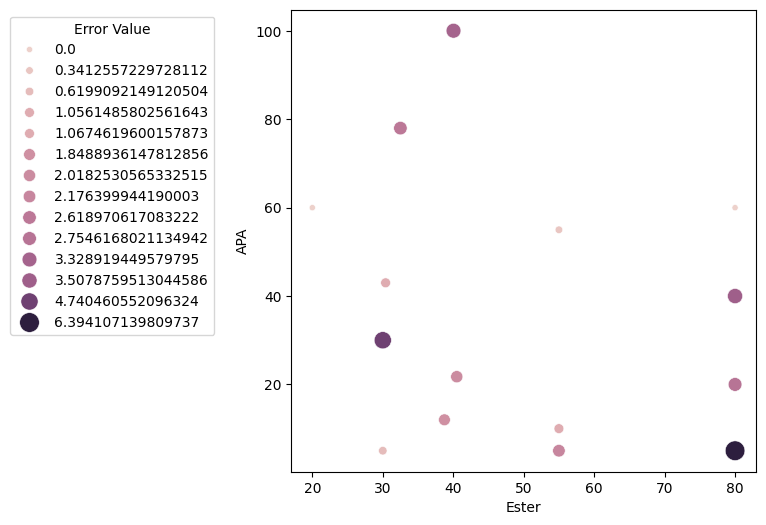

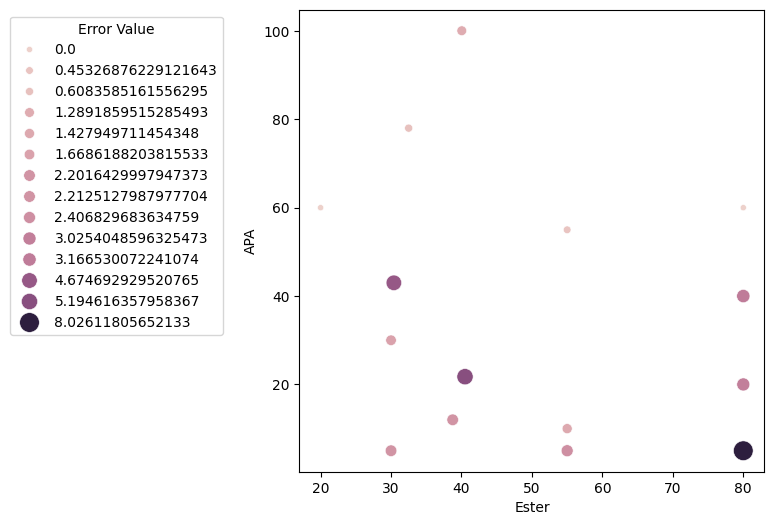

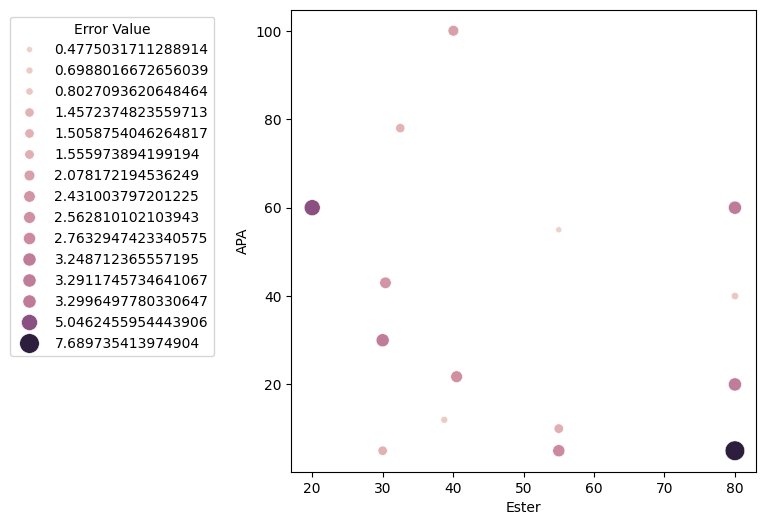

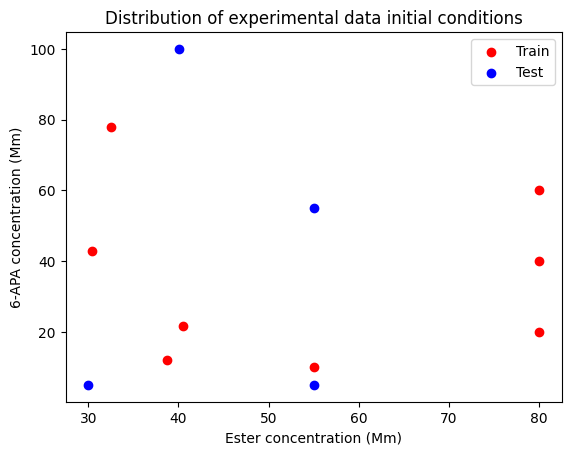

In [142]:

def eval_all(P_new,less_bad=False):
    x_names = ['ester_mm', 'amox_mm', 'apa_mm', 'aoh_mm']

    total_error = 0
    if less_bad:
        surface_error = np.zeros((len(data_frames),3)) # columns = mse error, ester init, apa init 
    else:
        surface_error = np.zeros((len(data_frames),3)) # columns = mse error, ester init, apa init 
    
    total_mass_error = 0
    for idx,df in enumerate(data_frames):
        x_target = data_frames[df].loc[:,x_names].to_numpy()
        t_target = data_frames[df]['apa_t'].to_numpy()
    
        ic = x_target[0]
        

        surface_error[idx,1] = ic[0] # ester
        surface_error[idx,2] = ic[2] # apa
        

        if ((ic[0] == 20 and ic[2] == 60) or (ic[0] == 80 and ic[2] == 60)) and (less_bad):
            surface_error[idx,0] = 0
            continue

        t_model = np.linspace(t_target[0],t_target[-1],40)
        
        sol = ode15s_amox(P_new,ic,t_model)
        sol_val = ode15s_amox(P_new,ic,t_target).T

        error = root_mean_squared_error(x_target.T, sol_val)
        mass_error = mass_deviation(sol_val,x_target.T)
        r2 = r2_score(x_target.T,sol_val)

        surface_error[idx,0] = error

        total_error += error
        total_mass_error += mass_error
        
        print(f'{ic} tmax_{int(t_model[-1])}:\t{error}\tmass: {mass_error}\tr2: {r2}')

        x_model = sol.T
        #model_eval(x_model.T,t_model,x_target,t_target)
        
    surfacedf = pd.DataFrame(surface_error,columns=['RMSE','Ester','APA'])
    
    plt.figure(figsize=(6,6))
    sns.scatterplot(data=surfacedf, x='Ester', y='APA', size='RMSE', hue='RMSE', sizes=(20, 200),legend='full')
    plt.legend(title='Error Value', loc='upper right', bbox_to_anchor=(-0.15, 1))
    #sns.heatmap(surfacedf,annot=True,fmt=".3f")
    print(f'Total error: {total_error/len(data_frames)}\tmass error:{total_mass_error/len(data_frames)}')
    
print("\nEval all old parameter set\n")
eval_all(luci_P,less_bad=True)
print("\nEval all new parameter set\n")
eval_all(P_new,less_bad=True)
print("\nEval all using only one assay\n")
eval_all([0.1501511605507313, 0.246722352445217, 12.189127692264432, 2.5152141233788545, 1.2037321026224677, 23.832289359795052, 2.9212837140231653, 6.837713021131063, 14.116422889322088, 27.69574587300607])
plt.figure()
plt.title("Distribution of experimental data initial conditions")
plt.xlabel("Ester concentration (Mm)")
plt.ylabel("6-APA concentration (Mm)")
plt.scatter(ic2trainplot[:,0],ic2trainplot[:,1],c='r');
plt.scatter(ic2testplot[:,0],ic2testplot[:,1],c='b');
plt.legend(['Train','Test']);

In [136]:
output_par100k, aceitacao100k = mcmc(P=luci_P,N=100000,status=True,results_folder='model_luci_multi_sel')

aceitacao:  0.7755 k:  77550


In [137]:
P_conf100k = pd.DataFrame(output_par100k)
P_mean100k = P_conf100k.describe().iloc[1,:].to_numpy()
print(P_mean100k)
P_new100k = P_mean100k
P_error100k = P_conf100k.describe().iloc[2,:].to_numpy() / np.sqrt(P_conf100k.size)

for i in range(len(labels)):
    print(f'{labels[i]}: {P_mean100k[i]} +- {P_error100k[i]}')

[1.65282884e-01 9.14130577e-04 3.28070227e-01 3.29562377e+00
 1.25597329e+00 1.20468776e+02 2.99418003e-01 2.07137681e+00
 5.30687194e-02 3.50888637e+01]
kcat1: 0.16528288409026876 +- 2.840063959017378e-05
kcat2: 0.0009141305770415546 +- 9.456403019482962e-07
Km1: 0.328070227392023 +- 0.00013746723753231156
Km2: 3.2956237727586286 +- 0.001815631448002245
Tmax: 1.2559732901827096 +- 0.00012550209586969848
Ken: 120.46877570750581 +- 0.014279454175672883
kAB: 0.2994180030429674 +- 0.0003207926510573021
kAN: 2.071376809596614 +- 0.000667135363726235
kAOH: 0.05306871939473177 +- 2.634281389379534e-05
kNH: 35.08886373465468 +- 0.012673229321338757



Eval all new parameter set

[20.  0. 60.  0.] tmax_490:	6.264333552235024	mass: 228.266645960101	r2: 0.9109874670127186
[30.  0. 30.  0.] tmax_490:	4.740460552096324	mass: 150.7529211274875	r2: 0.4986668287305179
[80.  0.  5.  0.] tmax_240:	6.394107139809737	mass: 183.96271124122816	r2: 0.811998076137016
[80.  0. 40.  0.] tmax_600:	3.5078759513044586	mass: 163.49377022702242	r2: 0.8473041711629549
[40.5         0.         21.75        3.37262013] tmax_540:	2.0182530565332515	mass: 71.63333112672065	r2: 0.9527676770578098
[30.4   0.   43.    2.55] tmax_540:	1.0674619600157873	mass: 38.42527788493518	r2: 0.992604930092891
[4.00389864e+01 6.40149834e-02 1.00045181e+02 1.42108547e+00] tmax_360:	3.328919449579795	mass: 111.85734023226512	r2: 0.9780888421554973
[55.        0.       55.        0.623377] tmax_50:	0.3412557229728112	mass: 7.15364857297183	r2: 0.9997202794508733
[55.  0.  5.  0.] tmax_60:	2.176399944190003	mass: 53.01182209715671	r2: 0.9763263719559329
[55.  0. 10.  0.] tmax_60

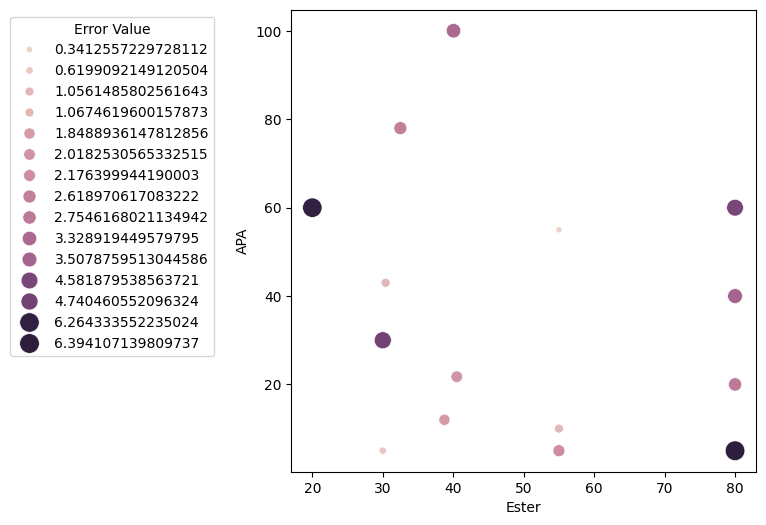

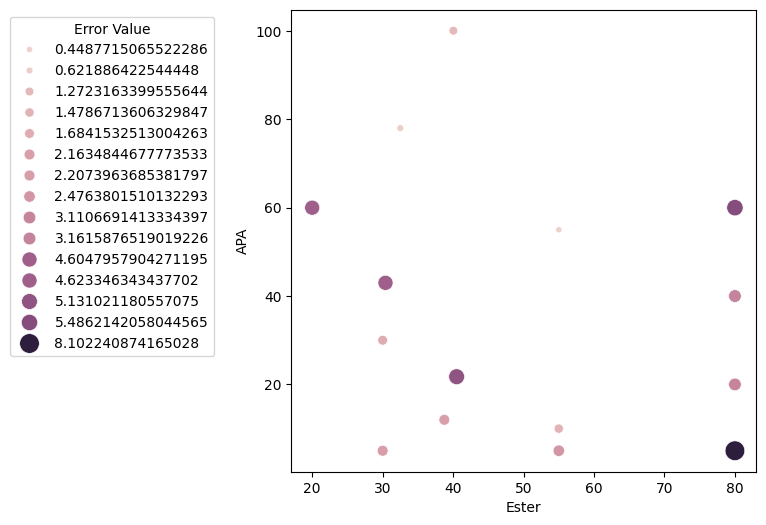

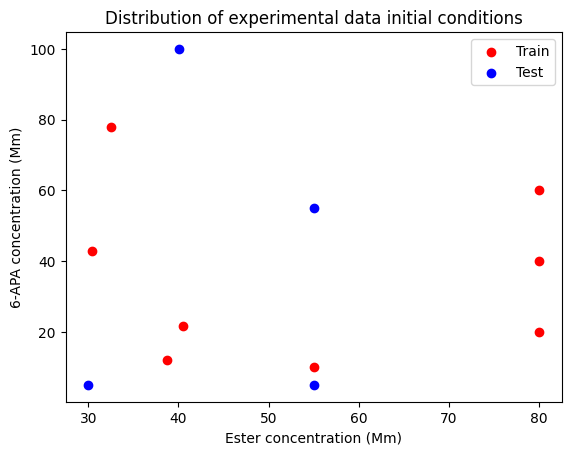

In [140]:
print("\nEval all new parameter set\n")
eval_all(luci_P)
print("\nEval all new parameter set\n")
eval_all(P_new100k)                                       ###!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! trocar
plt.figure()
plt.title("Distribution of experimental data initial conditions")
plt.xlabel("Ester concentration (Mm)")
plt.ylabel("6-APA concentration (Mm)")
plt.scatter(ic2trainplot[:,0],ic2trainplot[:,1],c='r');
plt.scatter(ic2testplot[:,0],ic2testplot[:,1],c='b');
plt.legend(['Train','Test']);

In [139]:
output_par500k, aceitacao500k = mcmc(P=luci_P,N=500000,status=True,results_folder='model_luci_multi_sel')

KeyboardInterrupt: 

In [109]:
P_conf500k = pd.DataFrame(output_par500k)
P_mean500k = P_conf500k.describe().iloc[1,:].to_numpy()
print(P_mean500k)
P_new500k = P_mean500k
P_error500k = P_conf500k.describe().iloc[2,:].to_numpy() / np.sqrt(P_conf500k.size)

for i in range(len(labels)):
    print(f'{labels[i]}: {P_mean500k[i]} +- {P_error500k[i]}')

[3.64134791e-01 4.10342887e-09 9.74344550e+00 1.07226073e+01
 5.59018258e-01 1.64728289e+01 5.22582858e-05 3.85154949e-01
 8.68437457e+00 4.93896969e+00]
kcat1: 0.36413479100349944 +- 2.675078157342062e-05
kcat2: 4.103428866595652e-09 +- 1.5350551508022492e-12
Km1: 9.743445501963489 +- 0.0018347112305217212
Km2: 10.722607290072526 +- 0.007169708199442989
Tmax: 0.5590182579217226 +- 2.711205105551485e-05
Ken: 16.472828850945806 +- 0.00193327694483009
kAB: 5.225828583362912e-05 +- 2.8469291128697122e-08
kAN: 0.38515494865552846 +- 7.417815253942767e-05
kAOH: 8.684374571263278 +- 0.003907604617445989
kNH: 4.93896969293589 +- 0.005796229958901723



Eval all new parameter set

[20.  0. 60.  0.] tmax_490:	6.264333552235024	mass: 228.266645960101	r2: 0.9109874670127186
[30.  0. 30.  0.] tmax_490:	4.740460552096324	mass: 150.7529211274875	r2: 0.4986668287305179
[80.  0.  5.  0.] tmax_240:	6.394107139809737	mass: 183.96271124122816	r2: 0.811998076137016
[80.  0. 40.  0.] tmax_600:	3.5078759513044586	mass: 163.49377022702242	r2: 0.8473041711629549
[40.5         0.         21.75        3.37262013] tmax_540:	2.0182530565332515	mass: 71.63333112672065	r2: 0.9527676770578098
[30.4   0.   43.    2.55] tmax_540:	1.0674619600157873	mass: 38.42527788493518	r2: 0.992604930092891
[4.00389864e+01 6.40149834e-02 1.00045181e+02 1.42108547e+00] tmax_360:	3.328919449579795	mass: 111.85734023226512	r2: 0.9780888421554973
[55.        0.       55.        0.623377] tmax_50:	0.3412557229728112	mass: 7.15364857297183	r2: 0.9997202794508733
[55.  0.  5.  0.] tmax_60:	2.176399944190003	mass: 53.01182209715671	r2: 0.9763263719559329
[55.  0. 10.  0.] tmax_60

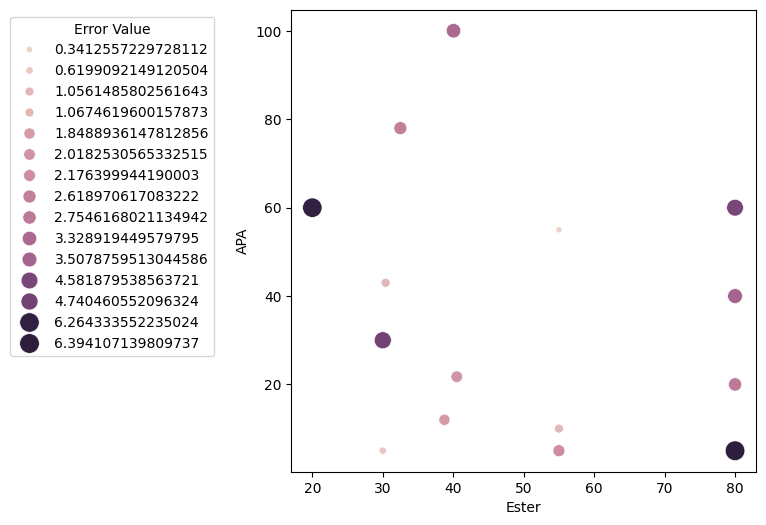

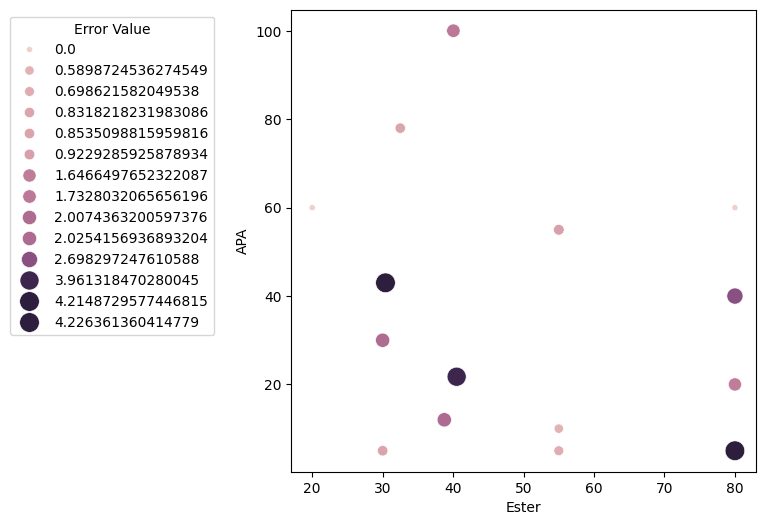

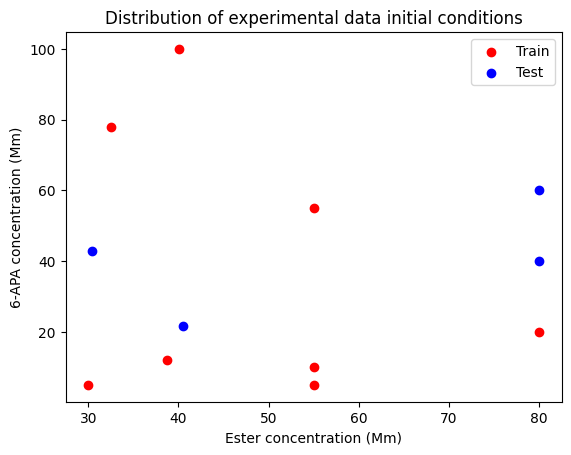

In [ ]:
print("\nEval all new parameter set\n")
eval_all(luci_P)
print("\nEval all new parameter set\n")
eval_all(P_new500k,less_bad=True)
plt.figure()
plt.title("Distribution of experimental data initial conditions")
plt.xlabel("Ester concentration (Mm)")
plt.ylabel("6-APA concentration (Mm)")
plt.scatter(ic2trainplot[:,0],ic2trainplot[:,1],c='r');
plt.scatter(ic2testplot[:,0],ic2testplot[:,1],c='b');
plt.legend(['Train','Test']);

In [40]:
output_par10000, aceitacao10000 = mcmc(P=luci_P,N=10000,status=True,results_folder='model_luci_double',waux=0.012)

aceitacao:  0.2785 k:  2785


In [41]:
P_conf10000 = pd.DataFrame(output_par10000)
P_mean10000 = P_conf10000.describe().iloc[1,:].to_numpy()
print(P_mean10000)
P_new500k = P_mean10000
P_error10000 = P_conf10000.describe().iloc[2,:].to_numpy() / np.sqrt(P_conf10000.size)

for i in range(len(labels)):
    print(f'{labels[i]}: {P_mean10000[i]} +- {P_error10000[i]}')

[5.51868177e-02 2.29847165e-01 1.24723007e-01 1.51114491e+01
 2.02829072e+00 7.31841322e+01 5.90968682e-02 1.63256352e+01
 7.25037696e+00 9.28100240e+01]
kcat1: 0.05518681773641532 +- 9.675602405475734e-08
kcat2: 0.22984716473021383 +- 9.883443132753697e-06
Km1: 0.12472300717349588 +- 2.1597297413991347e-06
Km2: 15.111449059316108 +- 8.662920277201207e-05
Tmax: 2.0282907242600574 +- 0.00013914310277475373
Ken: 73.18413218481726 +- 0.003624302459918816
kAB: 0.0590968682471767 +- 9.448038039814522e-07
kAN: 16.325635224384808 +- 0.0022667658562893762
kAOH: 7.250376962269299 +- 0.0004080488926756077
kNH: 92.81002399457115 +- 0.002196029043828195
